In [2]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
/bin/bash: cmake: command not found
make: *** No rule to make target 'install'.  Stop.


In [3]:
import pandas as pd
import numpy as np

from commons import linear_regression

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/ryan/UBA/Metodos/metnum-tp3/notebooks
Python 3.8.5


In [5]:
df = pd.read_csv('../data/train.csv')

2750
3245


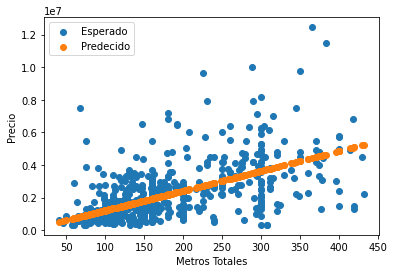

rmse: 2008586.3159942995
rmsle: 0.8844476095401805


NameError: name 'r2_score' is not defined

In [6]:
# Ver como influyen los outliers analizando el RMSE, pero con RMSLE se obtienen resultados parecidos

res,rmse,rmsle = linear_regression(df[df['ciudad']=='Cancún'],["metrostotales"], "precio")

print(df[df['ciudad']=='Cancún']["metrostotales"].dropna().size)
print(df[df['ciudad']=='Chihuahua']["metrostotales"].dropna().size)

plt.scatter(res[0]["x"]["metrostotales"],res[0]["expect"], label="Esperado")
plt.scatter(res[0]["x"]["metrostotales"],res[0]["pred"], label="Predecido")
plt.legend()
plt.xlabel("Metros Totales")
plt.ylabel("Precio")
#plt.savefig('CancunMetrosTotalesVsPrecio.png')
plt.show()

print('rmse:', rmse)
print('rmsle:', rmsle)
expec = res[0]["expect"]
pred = res[0]["pred"]
print('r2:', r2_score(expec,pred))

res,rmse,rmsle = linear_regression(df[df['ciudad']=='Toluca'],["metrostotales"], "precio")

plt.scatter(res[0]["x"]["metrostotales"],res[0]["expect"], label="Esperado")
plt.scatter(res[0]["x"]["metrostotales"],res[0]["pred"], label="Predecido")
plt.legend()
plt.xlabel("Metros Totales")
plt.ylabel("Precio")
#plt.savefig('TolucaMetrosTotalesVsPrecio.png')
plt.show()

print('rmse:', rmse)
print('rmsle:', rmsle)
expec = res[0]["expect"]
pred = res[0]["pred"]
print('r2:', r2_score(expec,pred))

In [ ]:
res,rmse,rmsle = linear_regression(df[df['ciudad']=='Chihuahua'],["metrostotales"], "precio")

plt.scatter(res[0]["x"]["metrostotales"],res[0]["expect"], label="Esperado")
plt.scatter(res[0]["x"]["metrostotales"],res[0]["pred"], label="Predecido")
plt.legend()
plt.xlabel("Metros Totales")
plt.ylabel("Precio")
# plt.savefig('ChihuahuaMetrosTotalesVsPrecio.png')
plt.show()

print('rmse:', rmse)
print('rmsle:', rmsle)

from sklearn.metrics import r2_score
expec = res[0]["expect"]
pred = res[0]["pred"]
print('r2:', r2_score(expec,pred))

In [ ]:
dfSinOutliers = df[df['ciudad']=='Chihuahua']
dfSinOutliers = dfSinOutliers[dfSinOutliers['precio']<4000000]

res,rmse,rmsle = linear_regression(dfSinOutliers,["metrostotales"], "precio")

plt.scatter(res[0]["x"]["metrostotales"],res[0]["expect"], label="Esperado")
plt.scatter(res[0]["x"]["metrostotales"],res[0]["pred"], label="Predecido")
plt.legend()
plt.xlabel("Metros Totales")
plt.ylabel("Precio")
# plt.savefig('ChihuahuaMetrosTotalesVsPrecioSinoutliers.png')
plt.show()

print('rmse:', rmse)
print('rmsle:', rmsle)

from sklearn.metrics import r2_score
expec = res[0]["expect"]
pred = res[0]["pred"]
print('r2:', r2_score(expec,pred))

In [ ]:
res,rmse,rmsle = linear_regression(df[df['ciudad']=='Chihuahua'],["metroscubiertos"], "banos")

plt.scatter(res[0]["x"]["metroscubiertos"],res[0]["expect"], label="Esperado")
plt.scatter(res[0]["x"]["metroscubiertos"],res[0]["pred"], label="Predecido")
plt.scatter(res[0]["x"]["metroscubiertos"],np.round(res[0]["pred"]), label="Redondeo")
plt.legend()
plt.xlabel("Metros Totales")
plt.ylabel("Precio")
# plt.savefig('ChihuahuaMetrosCubiertosVsBaños.png')
plt.show()

print('rmse:', rmse)
print('rmsle:', rmsle)

from sklearn.metrics import r2_score
expec = res[0]["expect"]
pred = res[0]["pred"]
print('r2:', r2_score(expec,pred))

In [ ]:
df[df['ciudad']=='Chihuahua']['metrostotales'].hist()

In [ ]:
df[df['ciudad']=='Chihuahua']['precio'].hist()

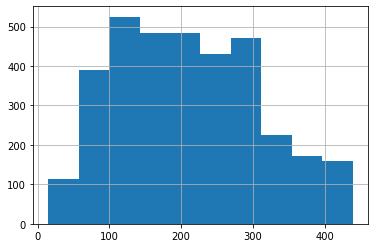

In [7]:
df[df['ciudad']=='Chihuahua']['metrostotales'].hist()